# Data Analyst Project

**Market Research, Recommendation and Visualization Technique for Business Decision Making**

DQLab Sport Center is a store that sells a variety of sporting apparels such as jackets, clothes, bags, and shoes. The store started its business in 2013 and has since had regular customers. Nowadays, the store is still trying to attract new customers.

At the beginning of 2019, the store manager recruited junior data analysts to help solve a problem: the declining number of returning customers. The junior data analysts were thus entrusted to analyze the store transaction data. The manager explained that a customer is considered churn when they do not perform any transaction in the last six months as per the latest data update.

The data is a record of 100,000 transactions from 2013 to 2019 in a file named `data_retail.csv`. The fields are:
1. No
2. Row_Num
3. Customer_ID
4. Product
5. First_Transaction
6. Last_Transaction
7. Average_Transaction_Amount
8. Count_Transaction

Tasks:
1. Data preparation: importing and cleansing
2. Data visualization
3. Data modeling: classification

In [1]:
# Data analysis
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

---

## Data Preparation

### Importing and inspecting data

In [2]:
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv', sep=';')
print('First five data:')
df.head()

First five data:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [3]:
print('Dataset information:')
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


### Cleansing data

Converting two columns that indicate time of transaction into a datetime type.

In [4]:
df['First_Transaction'] = pd.to_datetime(
    df['First_Transaction']/1000,
    unit='s',
    origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(
    df['Last_Transaction']/1000,
    unit='s',
    origin='1970-01-01')
print('First five data:')
df.head()

First five data:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25


In [5]:
print('Dataset information:')
print(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB
None


### Identifying churn
In order to determine whether or not a customer is churn we need to:
1. find the time of the latest transaction
2. label the customer as churn or not churn, according the manager's definition

In [6]:
max(df['Last_Transaction'])  # Latest transaction

Timestamp('2019-02-01 23:57:57.286000013')

Six months from 2019-02-01 is 2018-08-01. If there is no transaction after that date, the customer is churn.

In [7]:
# Add new column
df.loc[df['Last_Transaction']<='2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction']>'2018-08-01', 'is_churn'] = False 
print('First five data:')
df.head()

First five data:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False


In [8]:
print('Dataset information:')
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
 8   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.9+ MB


### Remove irrelevant columns

In [9]:
del df['no']
del df['Row_Num']
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False


In [10]:
print('Dataset information:')
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
 6   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 5.3+ MB


---

## Data Visualization

### Customer Acquisition by Year

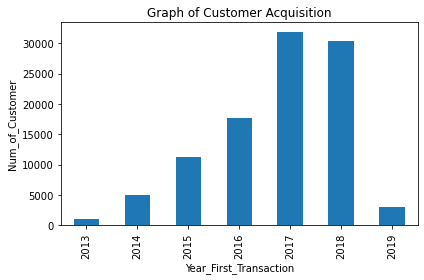

In [11]:
# Add two new columns: the year of first and last transaction
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

# Count customers acquired each year
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(
    x='Year_First_Transaction',
    y='Customer_ID',
    kind='bar',
    title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

### Transaction by Year

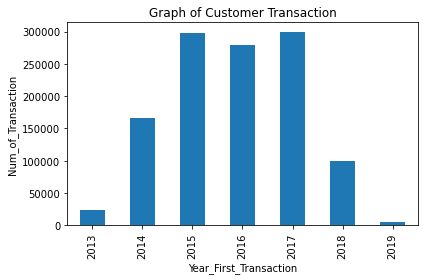

In [12]:
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(
    x='Year_First_Transaction',
    y='Count_Transaction',
    kind='bar',
    title='Graph of Customer Transaction')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

### Average Transaction Amount per Product by Year

DQLab Sport Center products: *baju* (clothes), *jaket* (jackets), *sepatu* (shoes), *tas* (bags)

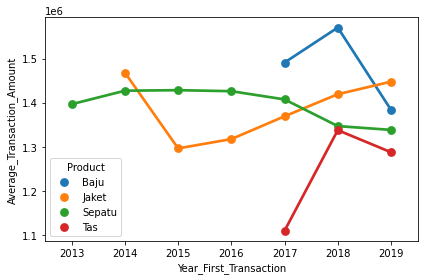

In [13]:
sns.pointplot(
    data=df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
    x='Year_First_Transaction',
    y='Average_Transaction_Amount',
    hue='Product')
plt.tight_layout()
plt.show()

### Proportion of Churned Customer by Product

In [14]:
df_piv = df.pivot_table(
    index='is_churn',
    columns='Product',
    values='Customer_ID',
    aggfunc='count',
    fill_value=0)
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
df_piv = df_piv.reindex(columns=plot_product)
df_piv

Product,Tas,Sepatu,Jaket,Baju
is_churn,,,,
False,4976,16064,11123,1268
True,7508,33090,23827,2144


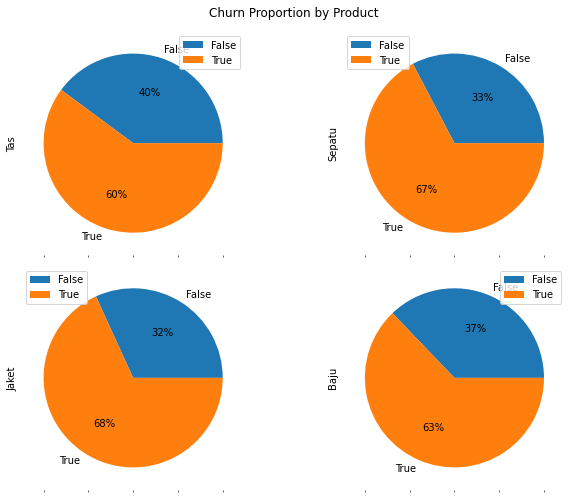

In [15]:
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Churn Proportion by Product')
plt.tight_layout()
plt.show()

Jackets have the highest customer churn proportion, followed closely by shoes.

### Customer Distribution by Transaction Count

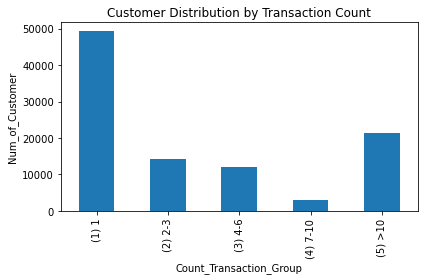

In [16]:
# Categorize transaction count into 5 groups
def func(row):
    if row['Count_Transaction'] == 1:
        val = '(1) 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='(2) 2-3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='(3) 4-6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='(4) 7-10'
    else:
        val ='(5) >10'
    return val

# Add a new column for transaction group
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(
    x='Count_Transaction_Group',
    y='Customer_ID',
    kind='bar',
    title='Customer Distribution by Transaction Count')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

A majority of the customers only completed 1 transaction.

### Customer Distribution by Average Transaction Amount

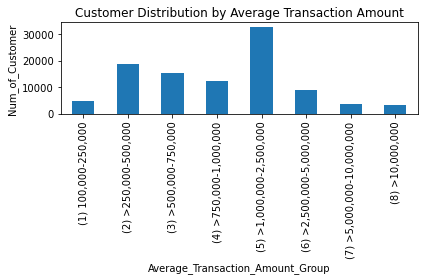

In [17]:
def fx(row):
    if (row['Average_Transaction_Amount'] >= 100000
        and row['Average_Transaction_Amount'] <=200000):
        val ='(1) 100,000-250,000'
    elif (row['Average_Transaction_Amount'] > 250000
          and row['Average_Transaction_Amount'] <=500000):
        val ='(2) >250,000-500,000'
    elif (row['Average_Transaction_Amount'] > 500000
          and row['Average_Transaction_Amount'] <=750000):
        val ='(3) >500,000-750,000'
    elif (row['Average_Transaction_Amount'] > 750000
          and row['Average_Transaction_Amount'] <=1000000):
        val ='(4) >750,000-1,000,000'
    elif (row['Average_Transaction_Amount'] > 1000000
          and row['Average_Transaction_Amount'] <=2500000):
        val ='(5) >1,000,000-2,500,000'
    elif (row['Average_Transaction_Amount'] > 2500000
          and row['Average_Transaction_Amount'] <=5000000):
        val ='(6) >2,500,000-5,000,000'
    elif (row['Average_Transaction_Amount'] > 5000000
          and row['Average_Transaction_Amount'] <=10000000):
        val ='(7) >5,000,000-10,000,000'
    else:
        val ='(8) >10,000,000'
    return val

df['Average_Transaction_Amount_Group'] = df.apply(fx, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(
    x='Average_Transaction_Amount_Group',
    y='Customer_ID',
    kind='bar',
    title='Customer Distribution by Average Transaction Amount')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

The average transaction amount with the highest customer count is between 1-2.5 million rupiahs.

## Modeling

### Defining Features dan Target
The target variables will be encoded into numerical types: `0` for **Not Churn** and `1` for **Churn**.

In [18]:
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']
X = df[feature_columns]  # Features variable
y = LabelEncoder().fit_transform(df['is_churn'])  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

### Train, Predict, Evaluate

Since this is a binary classification problem, a logistic regression model will be used to predict the customer churn.

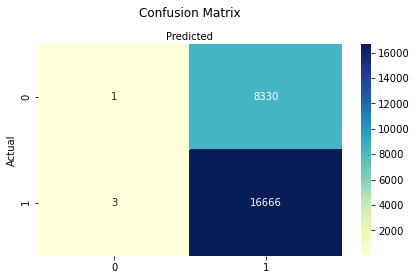

In [19]:
logreg = LogisticRegression()  # Initiate model
logreg.fit(X_train, y_train)  # Train the model
y_pred = logreg.predict(X_test)  # Make prediction
cnf_matrix = confusion_matrix(y_test, y_pred) # Evaluate model

# Plot the confusion matrix
class_names = [0, 1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(
    pd.DataFrame(cnf_matrix),
    annot=True,
    cmap='YlGnBu',
    fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [20]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.2500    0.0001    0.0002      8331
           1     0.6667    0.9998    0.8000     16669

    accuracy                         0.6667     25000
   macro avg     0.4584    0.5000    0.4001     25000
weighted avg     0.5279    0.6667    0.5335     25000



Although having a nearly perfect recall (99.98% of actual churn customer was correctly classified), the model achieved only 66.67% on both precision and testing accuracy. It yielded a very high number of False Positives, in which non-churn customers are incorrectly classified as churn.